# diabetes prediction using embeddings

In [653]:
import torch
import torch.nn.functional as F
import torch.nn as nn
import pandas as pd

In [654]:
data=pd.read_csv('datasets/automobile.csv').dropna()

In [655]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115.0,5500.0,18,22,17450
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110.0,5500.0,19,25,17710
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140.0,5500.0,17,20,23875
9,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.8,8.8,101.0,5800.0,23,29,16430


In [656]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159 entries, 3 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          159 non-null    int64  
 1   normalized-losses  159 non-null    float64
 2   make               159 non-null    object 
 3   fuel-type          159 non-null    object 
 4   aspiration         159 non-null    object 
 5   num-of-doors       159 non-null    object 
 6   body-style         159 non-null    object 
 7   drive-wheels       159 non-null    object 
 8   engine-location    159 non-null    object 
 9   wheel-base         159 non-null    float64
 10  length             159 non-null    float64
 11  width              159 non-null    float64
 12  height             159 non-null    float64
 13  curb-weight        159 non-null    int64  
 14  engine-type        159 non-null    object 
 15  num-of-cylinders   159 non-null    object 
 16  engine-size        159 non-null

In [657]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115.0,5500.0,18,22,17450
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110.0,5500.0,19,25,17710
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140.0,5500.0,17,20,23875
9,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.8,8.8,101.0,5800.0,23,29,16430


In [658]:
data.drop(columns=['engine-location'],inplace=True)
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164.0,audi,gas,std,four,sedan,fwd,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450
6,1,158.0,audi,gas,std,four,sedan,fwd,105.8,192.7,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710
8,1,158.0,audi,gas,turbo,four,sedan,fwd,105.8,192.7,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875
9,2,192.0,bmw,gas,std,two,sedan,rwd,101.2,176.8,...,108,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,16430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.0,volvo,gas,std,four,sedan,rwd,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845
197,-1,95.0,volvo,gas,turbo,four,sedan,rwd,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045
198,-1,95.0,volvo,gas,std,four,sedan,rwd,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485
199,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,109.1,188.8,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470


In [659]:
categorical_features=['symboling','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-type','num-of-cylinders','fuel-system']
out_feature=['price']

# categorical features -- embedding layers

In [661]:
from sklearn.preprocessing import LabelEncoder
lbl_encoder={}
for feature in categorical_features:
    lbl_encoder[feature]=LabelEncoder()
    data[feature]=lbl_encoder[feature].fit_transform(data[feature])


In [662]:
for i in data.columns:
    print(f'column name {i} and unique value are {len(data[i].unique())}')

column name symboling and unique value are 6
column name normalized-losses and unique value are 51
column name make and unique value are 18
column name fuel-type and unique value are 2
column name aspiration and unique value are 2
column name num-of-doors and unique value are 2
column name body-style and unique value are 5
column name drive-wheels and unique value are 3
column name wheel-base and unique value are 40
column name length and unique value are 56
column name width and unique value are 33
column name height and unique value are 39
column name curb-weight and unique value are 136
column name engine-type and unique value are 5
column name num-of-cylinders and unique value are 5
column name engine-size and unique value are 32
column name fuel-system and unique value are 6
column name bore and unique value are 33
column name stroke and unique value are 31
column name compression-ratio and unique value are 29
column name horsepower and unique value are 48
column name peak-rpm and

In [663]:
import numpy as np
cat_features=np.stack([data[i] for i in categorical_features],1)
cat_features

array([[ 4,  0,  1, ...,  2,  2,  4],
       [ 4,  0,  1, ...,  2,  1,  4],
       [ 3,  0,  1, ...,  2,  1,  4],
       ...,
       [ 1, 17,  1, ...,  4,  3,  4],
       [ 1, 17,  0, ...,  2,  3,  2],
       [ 1, 17,  1, ...,  2,  2,  4]], dtype=int64)

In [664]:
import torch
cat_features=torch.tensor(cat_features,dtype=torch.int64)
cat_features

tensor([[ 4,  0,  1,  ...,  2,  2,  4],
        [ 4,  0,  1,  ...,  2,  1,  4],
        [ 3,  0,  1,  ...,  2,  1,  4],
        ...,
        [ 1, 17,  1,  ...,  4,  3,  4],
        [ 1, 17,  0,  ...,  2,  3,  2],
        [ 1, 17,  1,  ...,  2,  2,  4]])

# categorical features -- embedding layers 

In [666]:
continous_features=[]
for i in data.columns:
    if i in categorical_features or i == 'price':
        pass
    else:
        continous_features.append(i)
# out_features=data['price']
continous_features

['normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg']

## stacking continous variables to tensor

In [668]:
data[continous_features].info()

<class 'pandas.core.frame.DataFrame'>
Index: 159 entries, 3 to 200
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  159 non-null    float64
 1   wheel-base         159 non-null    float64
 2   length             159 non-null    float64
 3   width              159 non-null    float64
 4   height             159 non-null    float64
 5   curb-weight        159 non-null    int64  
 6   engine-size        159 non-null    int64  
 7   bore               159 non-null    float64
 8   stroke             159 non-null    float64
 9   compression-ratio  159 non-null    float64
 10  horsepower         159 non-null    float64
 11  peak-rpm           159 non-null    float64
 12  city-mpg           159 non-null    int64  
 13  highway-mpg        159 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 18.6 KB


# continous variables into tensor objects

In [670]:
cont_values=np.stack([data[i].values for i in continous_features] ,axis=1)
cont_values=torch.tensor(cont_values,dtype=torch.float)
cont_values

tensor([[ 164.0000,   99.8000,  176.6000,  ..., 5500.0000,   24.0000,
           30.0000],
        [ 164.0000,   99.4000,  176.6000,  ..., 5500.0000,   18.0000,
           22.0000],
        [ 158.0000,  105.8000,  192.7000,  ..., 5500.0000,   19.0000,
           25.0000],
        ...,
        [  95.0000,  109.1000,  188.8000,  ..., 5500.0000,   18.0000,
           23.0000],
        [  95.0000,  109.1000,  188.8000,  ..., 4800.0000,   26.0000,
           27.0000],
        [  95.0000,  109.1000,  188.8000,  ..., 5400.0000,   19.0000,
           25.0000]])

In [671]:
y=torch.tensor(data['price'].values, dtype=torch.float).reshape(-1,1)
y

tensor([[13950.],
        [17450.],
        [17710.],
        [23875.],
        [16430.],
        [16925.],
        [20970.],
        [21105.],
        [ 5151.],
        [ 6295.],
        [ 6575.],
        [ 5572.],
        [ 6377.],
        [ 7957.],
        [ 6229.],
        [ 6692.],
        [ 7609.],
        [ 8921.],
        [12964.],
        [ 6479.],
        [ 6855.],
        [ 5399.],
        [ 6529.],
        [ 7129.],
        [ 7295.],
        [ 7295.],
        [ 7895.],
        [ 9095.],
        [ 8845.],
        [10295.],
        [12945.],
        [10345.],
        [32250.],
        [ 5195.],
        [ 6095.],
        [ 6795.],
        [ 6695.],
        [ 7395.],
        [ 8845.],
        [ 8495.],
        [10595.],
        [10245.],
        [11245.],
        [18280.],
        [25552.],
        [28248.],
        [28176.],
        [31600.],
        [35056.],
        [ 5389.],
        [ 6189.],
        [ 6669.],
        [ 7689.],
        [ 9959.],
        [ 8499.],
        [ 

# compare the number of columns from the original dataset

In [673]:
cat_features.shape, cont_values.shape, y.shape, data.shape

(torch.Size([159, 10]), torch.Size([159, 14]), torch.Size([159, 1]), (159, 25))

In [674]:
cat_dim=[len(data[col].unique()) for col in categorical_features]
cat_dim

[6, 18, 2, 2, 2, 5, 3, 5, 5, 6]

## embedding layer

In [676]:
embedding_dim=[(x, min(50,(x+1)//2)) for x in cat_dim]

In [677]:
embedding_dim

[(6, 3),
 (18, 9),
 (2, 1),
 (2, 1),
 (2, 1),
 (5, 3),
 (3, 2),
 (5, 3),
 (5, 3),
 (6, 3)]

In [678]:
embed_representation=nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
embed_representation

ModuleList(
  (0): Embedding(6, 3)
  (1): Embedding(18, 9)
  (2-4): 3 x Embedding(2, 1)
  (5): Embedding(5, 3)
  (6): Embedding(3, 2)
  (7-8): 2 x Embedding(5, 3)
  (9): Embedding(6, 3)
)

In [679]:
embedding_val=[]
for i, e in enumerate(embed_representation):
    # print(i,e)
    embedding_val.append(e(cat_features[:,i]))

embedding_val

[tensor([[ 0.3771,  0.5802, -1.3250],
         [ 0.3771,  0.5802, -1.3250],
         [-0.4167, -0.5311,  1.1934],
         [-0.4167, -0.5311,  1.1934],
         [ 0.3771,  0.5802, -1.3250],
         [ 0.3281, -1.3991,  0.4536],
         [ 0.3281, -1.3991,  0.4536],
         [ 0.3281, -1.3991,  0.4536],
         [ 0.3771,  0.5802, -1.3250],
         [-0.4167, -0.5311,  1.1934],
         [ 0.3281, -1.3991,  0.4536],
         [-0.4167, -0.5311,  1.1934],
         [-0.4167, -0.5311,  1.1934],
         [-0.4167, -0.5311,  1.1934],
         [-0.4167, -0.5311,  1.1934],
         [-0.4167, -0.5311,  1.1934],
         [-0.4167, -0.5311,  1.1934],
         [-0.7194,  1.2796, -0.3289],
         [-0.0210, -0.1862,  1.1813],
         [ 0.3771,  0.5802, -1.3250],
         [ 0.3771,  0.5802, -1.3250],
         [-0.4167, -0.5311,  1.1934],
         [-0.4167, -0.5311,  1.1934],
         [-0.4167, -0.5311,  1.1934],
         [ 0.3281, -1.3991,  0.4536],
         [ 0.3281, -1.3991,  0.4536],
         [ 0

In [680]:
z=torch.cat(embedding_val,axis=1)
z.shape

torch.Size([159, 29])

In [681]:
dropout=nn.Dropout(.4)

In [682]:
# from sklearn.model_selection import train_test_split
# xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)
# xtrain.shape,xtest.shape,ytest.shape,ytrain.shape

In [683]:
final_embeded=dropout(z)
final_embeded

tensor([[ 0.6285,  0.0000, -2.2084,  ..., -0.8240, -0.0000, -0.2232],
        [ 0.6285,  0.9670, -2.2084,  ..., -0.8240, -0.0941, -0.0000],
        [-0.6945, -0.8852,  1.9890,  ..., -0.0000, -0.0000, -0.2232],
        ...,
        [-1.1989,  2.1326, -0.0000,  ..., -0.0000, -0.0000, -0.0000],
        [-0.0000,  2.1326, -0.0000,  ..., -2.8754, -0.0000,  0.0000],
        [-0.0000,  0.0000, -0.5481,  ..., -0.0000, -0.0000, -0.2232]],
       grad_fn=<MulBackward0>)

# creating neural network

In [685]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [686]:
class FeedForwardNN(nn.Module):
    def __init__(self,embedding_dim,n_count,outsz,layers,p=0.5):
        super().__init__()
        self.embeds=nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
        self.emb_drop=nn.Dropout(p)
        self.bn_count=nn.BatchNorm1d(n_count)


        layerlist=[]
        n_emb=sum((out for inp,out in embedding_dim))
        n_in=n_emb+n_count


        for i in layers:
            layerlist.append(nn.Linear(n_in,i))
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in=i

        layerlist.append(nn.Linear(layers[-1],outsz))
        self.layers=nn.Sequential(*layerlist)


    def forward(self,x_cat,x_cont):
        embeddings=[]
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x=torch.cat(embeddings,1)
        x=self.emb_drop(x)
        
        x_cont=self.bn_count(x_cont)
        x=torch.cat([x,x_cont],1)
        x=self.layers(x)
        return x

In [687]:
print(len(continous_features))
embedding_dim

14


[(6, 3),
 (18, 9),
 (2, 1),
 (2, 1),
 (2, 1),
 (5, 3),
 (3, 2),
 (5, 3),
 (5, 3),
 (6, 3)]

In [688]:
torch.manual_seed(100)
model=FeedForwardNN(embedding_dim,len(continous_features),1,[100,50],p=0.4)

In [689]:
model=model.cuda()

In [690]:
model.parameters

<bound method Module.parameters of FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(6, 3)
    (1): Embedding(18, 9)
    (2-4): 3 x Embedding(2, 1)
    (5): Embedding(5, 3)
    (6): Embedding(3, 2)
    (7-8): 2 x Embedding(5, 3)
    (9): Embedding(6, 3)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_count): BatchNorm1d(14, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=43, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)>

In [691]:
loss_function=nn.MSELoss() ### later convert into RMSE
optimizer=torch.optim.Adam(model.parameters(), lr=0.01)

In [692]:
print(f'dataset shape: {data.shape}')
print(f'continous features shape: {cont_values.shape}')
print(f'categorical features shape: {cat_features.shape}')
print(f'target variables shape: {y.shape}')

dataset shape: (159, 25)
continous features shape: torch.Size([159, 14])
categorical features shape: torch.Size([159, 10])
target variables shape: torch.Size([159, 1])


# train test split

In [694]:
batch_size=1200
test_size=int(batch_size*0.15)
train_categorical=cat_features[:batch_size-test_size].cuda()
test_categorical=cat_features[batch_size-test_size:batch_size].cuda()
train_cont=cont_values[:batch_size-test_size].cuda()
test_cont=cont_values[batch_size-test_size:batch_size].cuda()
ytrain=y[:batch_size-test_size].cuda()
ytest=y[batch_size-test_size:batch_size].cuda()
train_categorical

tensor([[ 4,  0,  1,  ...,  2,  2,  4],
        [ 4,  0,  1,  ...,  2,  1,  4],
        [ 3,  0,  1,  ...,  2,  1,  4],
        ...,
        [ 1, 17,  1,  ...,  4,  3,  4],
        [ 1, 17,  0,  ...,  2,  3,  2],
        [ 1, 17,  1,  ...,  2,  2,  4]], device='cuda:0')

In [695]:
len(train_categorical),len(test_categorical),len(train_cont), len(test_cont), len(ytrain), len(ytest)

(159, 0, 159, 0, 159, 0)

In [696]:
import time
epochs=1000
final_losses=[]
st=time.time()
for i in range(epochs):
    i=i+1
    y_pred=model(train_categorical,train_cont)
    loss=torch.sqrt(loss_function(y_pred,ytrain))
    final_losses.append(loss.cpu().data.numpy())
    if i%10==1:
        print(f'epoch number: {i} and the loss: {loss.item()}')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
et=time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

epoch number: 1 and the loss: 12858.3857421875
epoch number: 11 and the loss: 12854.861328125
epoch number: 21 and the loss: 12850.4677734375
epoch number: 31 and the loss: 12843.990234375
epoch number: 41 and the loss: 12834.439453125
epoch number: 51 and the loss: 12822.4990234375
epoch number: 61 and the loss: 12806.4765625
epoch number: 71 and the loss: 12790.65234375
epoch number: 81 and the loss: 12769.130859375
epoch number: 91 and the loss: 12743.9912109375
epoch number: 101 and the loss: 12717.419921875
epoch number: 111 and the loss: 12682.9775390625
epoch number: 121 and the loss: 12646.3408203125
epoch number: 131 and the loss: 12611.0576171875
epoch number: 141 and the loss: 12571.0126953125
epoch number: 151 and the loss: 12521.24609375
epoch number: 161 and the loss: 12473.3544921875
epoch number: 171 and the loss: 12429.853515625
epoch number: 181 and the loss: 12363.5234375
epoch number: 191 and the loss: 12290.8974609375
epoch number: 201 and the loss: 12254.708984375

In [697]:
torch.cuda.memory_allocated()

17607168

Text(0.5, 0, 'epoch')

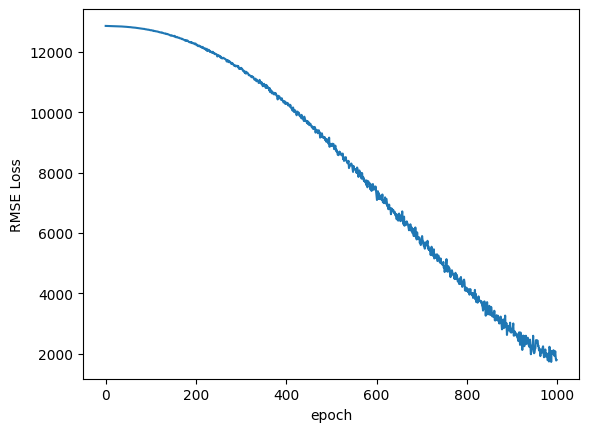

In [698]:
import matplotlib.pyplot as plt
plt.plot(range(epochs),final_losses)
plt.ylabel('RMSE Loss')
plt.xlabel('epoch')

In [738]:
y_pred=''
with torch.no_grad():
    y_pred=model(test_categorical,test_cont)
    loss=torch.sqrt(loss_function(y_pred,ytest))
print(f'RMSE: {loss}')

RMSE: nan


In [ ]:
data_verify=pd.DataFrame(ytest.tolist(),columns=['Test'])
data_predicted=pd.DataFrame(y_pred.tolist(),columns=['Prediction'])